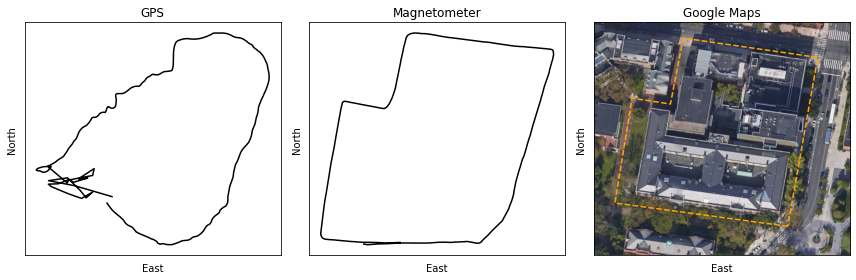

In [2]:
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread


def load_data(lat_lng_fname, yaw_fname, groundtruth_fname):
    lat, lng = np.loadtxt(lat_lng_fname, delimiter=',').T
    yaw = np.loadtxt(yaw_fname, delimiter=',')
    groundtruth = np.loadtxt(groundtruth_fname, delimiter=',')
    return lat, lng, yaw, groundtruth


def gen_xy_from_lat_lng(lat, lng, circ):
    lat_adj = lat - lat[0]
    lng_adj = lng - lng[0]
    x = -lng_adj * (circ * np.cos(lat) / 360)
    y = +lat_adj * (circ / 360)
    return x, y


def rotate(x, y, theta):
    c, s = np.cos(theta), np.sin(theta)
    rotation = [[c, -s], [s, c]]
    x, y = rotation @ np.c_[x, y].T
    return x, y


def gen_xy_from_yaw(yaw, dt, v0):
    psi0 = -np.pi / 2 + yaw[0]
    psiR = yaw
    dxdt = v0 * np.sin(psi0 - psiR)
    dydt = v0 * np.cos(psi0 - psiR)
    x = (dt * dxdt).cumsum()
    y = (dt * dydt).cumsum()
    return x, y


def shift_and_scale(x0, y0, x1, y1):
    ux = x1.mean() - x0.mean()
    uy = y1.mean() - y0.mean()
    alpha_x = (x0.max() - x0.min()) / (x1.max() - x1.min())
    alpha_y = (y0.max() - y0.min()) / (y1.max() - y1.min())
    x1 = alpha_x * (x1 - ux)
    y1 = alpha_y * (y1 - uy)
    return x1, y1


def configure_axis(axis, title):
    axis.set_xticklabels([])
    axis.set_yticklabels([])
    axis.tick_params(axis='both', which='both', length=0)
    axis.set_xlabel('East')
    axis.set_ylabel('North')
    axis.set_title(title)


def plot_navigation(x0, y0, x1, y1, groundtruth, img):
    x2, y2 = groundtruth.T
    fig, axarr = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
    titles = ['GPS', 'Magnetometer', 'Google Maps']
    axarr[0].plot(x0, y0, c='black')
    axarr[1].plot(x1, y1, c='black')
    axarr[2].plot(x2, y2, c='orange', linestyle='dashed')
    axarr[2].imshow(img, aspect='auto')
    for i in range(3):
        configure_axis(axarr[i], titles[i])
    fig.tight_layout()
    plt.savefig('./data/dead-reckoning.png')


def main():
    circ = 40.075 * 1e6  # Circumference of the Earth (m)
    vel = 0.97           # Measured walking speed (m/s)
    dt = 0.02            # Interval between yaw samples (s)
    fpaths = ['./data/lat-lng.csv', './data/yaw.csv', './data/groundtruth.csv']
    lat, lng, yaw, groundtruth = load_data(*fpaths)
    x0, y0 = gen_xy_from_lat_lng(lat, lng, circ)
    x0, y0 = rotate(x0, y0, -np.pi / 9)
    x1, y1 = gen_xy_from_yaw(yaw, dt, vel)
    x1, y1 = shift_and_scale(x0, y0, x1, y1)
    img = imread('./data/upenn.png')
    plot_navigation(x0, y0, x1, y1, groundtruth, img)


if __name__ == '__main__':
    main()


NameError: name 'x' is not defined

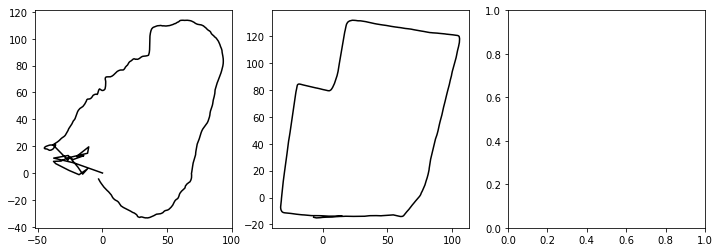

In [10]:

circ = 40.075 * 1e6  # Circumference of the Earth (m)
vel = 0.97           # Measured walking speed (m/s)
dt = 0.02            # Interval between yaw samples (s)
fpaths = ['./data/lat-lng.csv', './data/yaw.csv', './data/groundtruth.csv']
lat, lng, yaw, groundtruth = load_data(*fpaths)
fig, axarr = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
x0, y0 = gen_xy_from_lat_lng(lat, lng, circ)

x0, y0 = rotate(x0, y0, -np.pi / 9)
x1, y1 = gen_xy_from_yaw(yaw, dt, vel)
x1, y1 = shift_and_scale(x0, y0, x1, y1)
axarr[0].plot(x0, y0, c='black')

axarr[1].plot(x1, y1, c='black')
axarr[2].plot(x, y, c='orange', linestyle='dashed')
axarr[2].imshow(img, aspect='auto')


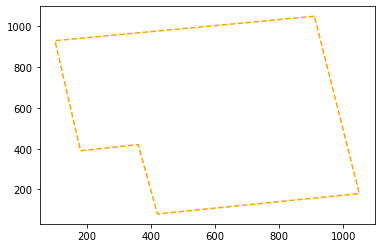

In [26]:
x2, y2 = groundtruth.T
img = imread('./data/upenn.png')
titles = ['GPS', 'Magnetometer', 'Google Maps']

plt.plot(x2, y2, c='orange', linestyle='dashed')
plt.show()